# Battle of the Neighborhood Coursera Capstone Project

### Importing necessary packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# packages for importing datasets from desktop
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
# packages for geocoding
! pip install geopandas
! pip install geopy
from geopy.geocoders import Nominatim


     |████████████████████████████████| 962 kB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 46.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 57.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.4 MB 49.6 MB/s eta 0:00:01


### Using IBM's prewritten code to import the property sales data and read it into a Pandas dataframe

In [2]:
# The code was removed by Watson Studio for sharing.

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


### Using IBM's prewritten code to import the crime data and read it into a Pandas dataframe

In [3]:

body = client_7fd39dcb8b7a44238cdd0452318e7a8c.get_object(Bucket='courseracapstoneproject-donotdelete-pr-tjdpihegjjddo1',Key='NYPD_Complaint_Data_Historic.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crimedata = pd.read_csv(body)
crimedata.head()


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


### Cleaning sales data

In [4]:


#dropping unnecessary columns
salesdata=salesdata[["ADDRESS","LAND SQUARE FEET", "GROSS SQUARE FEET", "SALE PRICE"]]

#Replacing '-' values with '0' for all columns
salesdata['SALE PRICE']=salesdata['SALE PRICE'].str.replace('-','0')
salesdata['LAND SQUARE FEET']=salesdata['LAND SQUARE FEET'].str.replace('-','0')
salesdata['GROSS SQUARE FEET']=salesdata['GROSS SQUARE FEET'].str.replace('-','0')\

#Converting data type of approriate columns to int
salesdata['SALE PRICE']=salesdata['SALE PRICE'].astype(int)
salesdata['LAND SQUARE FEET']=salesdata['LAND SQUARE FEET'].astype(int)
salesdata['GROSS SQUARE FEET']=salesdata['GROSS SQUARE FEET'].astype(int)



In [5]:
#Creating new column of total area of property
salesdata['TOTAL AREA']=salesdata['LAND SQUARE FEET']+salesdata['GROSS SQUARE FEET']
#Removing all entries with zero total area
salesdata=salesdata[(salesdata['TOTAL AREA']>0)]
#Resetting index
salesdata.reset_index(drop=True, inplace=True)
#Reordering data set, and dropping gross and land area columns
salesdata=salesdata[["ADDRESS", "TOTAL AREA","SALE PRICE"]]

In [8]:
salesdata.reset_index(drop=True, inplace=True)
salesdata

,ADDRESS,TOTAL AREA,SALE PRICE
0,219 WEST 15TH STREET,7896,1583840
1,219 WEST 15TH STREET,7896,416790
2,219 WEST 15TH STREET,7896,630370
3,309 WEST 20TH STREET,16800,282000
4,114 MULBERRY STREET,5017,93000
...,...,...,...
26599,112 ROBIN COURT,13248,648000
26600,37 QUAIL LANE,4975,450000
26601,32 PHEASANT LANE,4875,550000
26602,49 PITNEY AVENUE,5496,460000


In [9]:
# getting lat and long coords for each address
geolocator = Nominatim(user_agent="courserscapstone")
lat = []
long = []
i=0
for row in salesdata['ADDRESS']:
    address=row+', New York'
    addr = geolocator.geocode(address, timeout=10)
    if addr is None:
        lat.append(None)
        long.append(None)
    else:
        latitude = addr.latitude
        longitude = addr.longitude  
        lat.append(latitude)
        long.append(longitude)
    
    i=i+1
    if (i%100==0):
        print(i,end=",")


100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000,3100,3200,3300,3400,3500,3600,3700,3800,3900,4000,4100,4200,4300,4400,4500,4600,4700,4800,4900,5000,5100,5200,5300,5400,5500,5600,5700,5800,5900,6000,6100,6200,6300,6400,6500,6600,6700,6800,6900,7000,7100,7200,7300,7400,7500,7600,7700,7800,7900,8000,8100,8200,8300,8400,8500,8600,8700,8800,8900,9000,9100,9200,9300,9400,9500,9600,9700,9800,9900,10000,10100,10200,10300,10400,10500,10600,10700,10800,10900,11000,11100,11200,11300,11400,11500,11600,11700,11800,11900,12000,12100,12200,12300,12400,12500,12600,12700,12800,12900,13000,13100,13200,13300,13400,13500,13600,13700,13800,13900,14000,14100,14200,14300,14400,14500,14600,14700,14800,14900,15000,15100,15200,15300,15400,15500,15600,15700,15800,15900,16000,16100,16200,16300,16400,16500,16600,16700,16800,16900,17000,17100,17200,17300,17400,17500,17600,17700,17800,17900,18000,18100,18200,18300,18400,1850

In [11]:
# assigning coords to sales dataframe and removing all null properties
salesdata['LATITUDE']=lat
salesdata['LONGITUDE']=long
salesdata=salesdata[(salesdata['LATITUDE']!=None)]
salesdata=salesdata[(salesdata['LONGITUDE']!=None)]



In [5]:
# The code was removed by Watson Studio for sharing.

In [21]:
#exporting salesdata to save processing costs
project.save_data(data=salesdata.to_csv(index=False),file_name='salesdatafinal.csv',overwrite=True)

{'file_name': 'salesdatafinal.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'capstonetemporary-donotdelete-pr-bynk94cxysdzus',
 'asset_id': '5fa356c3-25b7-4631-be66-614aef499ee5'}

### Cleaning crime data

In [24]:
# dropping unecessary content
crimedata=crimedata[["CMPLNT_NUM","Latitude","Longitude"]]
crimedata.shape

(1048575, 3)

### Getting foursquare data(FAILED DUE TO PAYMENT ISSUES HENCE WILL BE LEFT AS MARKDOWN)

# @hidden_cell
CLIENT_ID = 'X5YXLJ0WAZYXGK2U0B2DT44T12UU2UKKAUBQS20DVYS0HCJ1' #  Foursquare ID
CLIENT_SECRET = 'E3QVSSQHUFWD5FTCSJX00MGFIUITFHDMMZSGFQLNIULAJ5WD' # your Foursquare Secret
ACCESS_TOKEN = '3BCGINRHOT44QX3Y5S5TLCIWAWZRHV0XCEBB2WMO1KQCHILF#_=_' # your FourSquare Access Token
VERSION = '20180604'
radius=200
LIMIT = 100

#Using foursquare to get nearby venues
salesdata.dropna(inplace=True)
venuelist=[]
longitudelist=salesdata['LONGITUDE']
latitudelist=salesdata['LATITUDE']
for lati,longi in zip(latitudelist,longitudelist):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lati, 
            longi, 
            radius, 
            LIMIT) 
    results = requests.get(url).json()
    venuelist.append(results['response']['totalResults'])  
finaldf=salesdata  
finaldf['NEARBY VENUES']=venuelist
finaldf=finaldf['TOTAL AREA','NEARBY VENUES','SALE PRICE','LONGITUDE','LATITUDE']

In [7]:
# The code was removed by Watson Studio for sharing.

,ADDRESS,TOTAL AREA,SALE PRICE,LATITUDE,LONGITUDE
0,219 WEST 15TH STREET,7896,1583840,40.739803,-73.999934
1,219 WEST 15TH STREET,7896,416790,40.739803,-73.999934
2,219 WEST 15TH STREET,7896,630370,40.739803,-73.999934
3,309 WEST 20TH STREET,16800,282000,40.743829,-74.000431
4,114 MULBERRY STREET,5017,93000,40.717593,-73.998162


In [8]:
# retrieving nearby nypd complaints
crimelist=[]
longitudelist=finaldf['LONGITUDE']
latitudelist=finaldf['LATITUDE']
for lati,longi in zip(latitudelist,longitudelist):
    temporary=finaldf.loc[((finaldf['LONGITUDE'] > longi-(0.0015)) & (finaldf['LONGITUDE'] < longi+(0.0015)) & (finaldf['LATITUDE'] < lati+(0.0015)) & (finaldf['LATITUDE'] > lati-(0.0015)))]
    length,width=temporary.shape
    crimelist.append(length)
finaldf['NEARBY CRIMES']=crimelist
finaldf=finaldf[['TOTAL AREA','NEARBY CRIMES','SALE PRICE','LONGITUDE','LATITUDE']]

In [9]:
finaldf

,TOTAL AREA,NEARBY CRIMES,SALE PRICE,LONGITUDE,LATITUDE
0,7896,3,1583840,-73.999934,40.739803
1,7896,3,416790,-73.999934,40.739803
2,7896,3,630370,-73.999934,40.739803
3,16800,1,282000,-74.000431,40.743829
4,5017,2,93000,-73.998162,40.717593
...,...,...,...,...,...
26599,13248,6,648000,-74.221560,40.535527
26600,4975,7,450000,-74.221130,40.532527
26601,4875,4,550000,-74.222314,40.532644
26602,5496,9,460000,-74.219179,40.530314


In [10]:
#filtering dataset based on area
finaldf=finaldf[finaldf['TOTAL AREA']>0]
finaldf=finaldf[finaldf['TOTAL AREA']<12000]

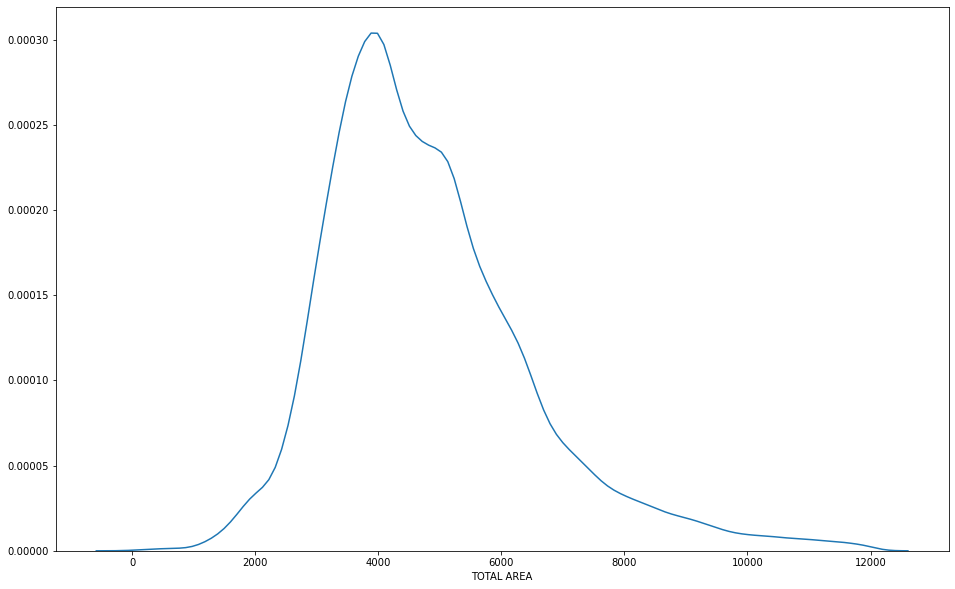

In [11]:
#plotting distribution of total area
plt.figure(figsize=(16, 10))
ax=sns.distplot(finaldf['TOTAL AREA'], hist = False , kde = True,)
ax.ticklabel_format( style='plain')
plt.show()

In [12]:
#filtering dataset based on crime
finaldf=finaldf[finaldf['NEARBY CRIMES']<25]

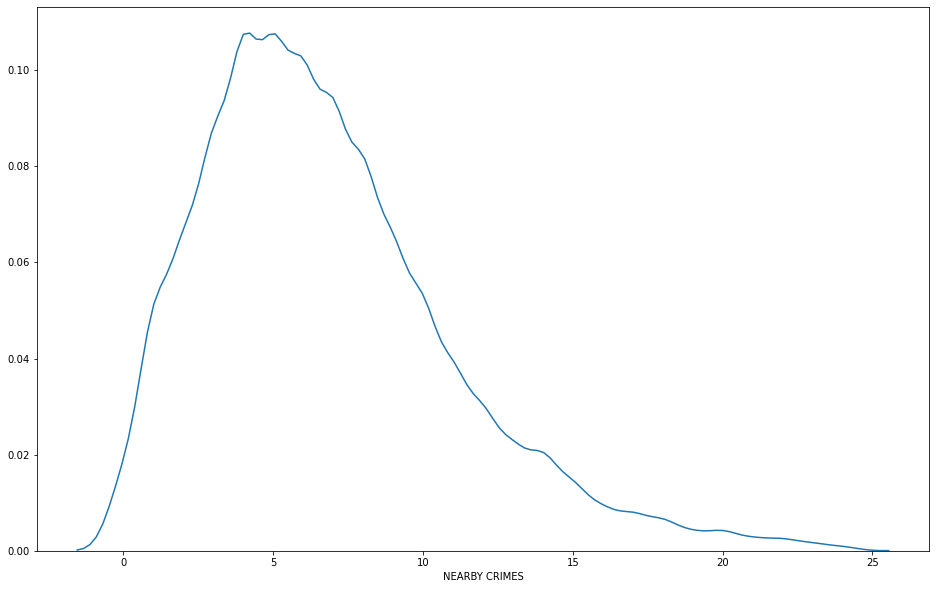

In [13]:
#plotting distribution of crime
plt.figure(figsize=(16, 10))
ax=sns.distplot(finaldf['NEARBY CRIMES'], hist = False , kde = True,)
ax.ticklabel_format( style='plain')
plt.show()

In [14]:
#filtering dataset based on sale price
finaldf=finaldf[finaldf['SALE PRICE']>19000]
finaldf=finaldf[finaldf['SALE PRICE']<2000000]

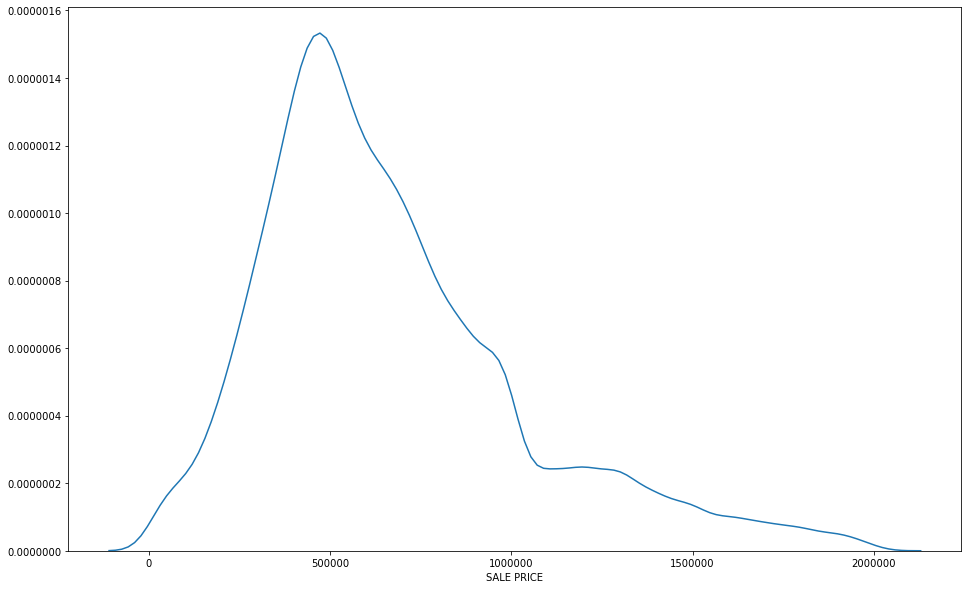

In [15]:
#plotting distribution of sale price
plt.figure(figsize=(16, 10))
ax=sns.distplot(finaldf['SALE PRICE'], hist = False, kde = True,)
ax.ticklabel_format( style='plain')
plt.show()

In [16]:
#resetting index for dataframe after filtering
finaldf.reset_index(drop=True,inplace=True)

In [17]:
#descriptive statistics for dataset
finaldf.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,TOTAL AREA,NEARBY CRIMES,SALE PRICE,LONGITUDE,LATITUDE
count,25818.00000,25818.00000,25818.00000,25382.00000,25382.00000
mean,4817.50318,6.77593,664769.24971,-73.62029,40.71255
std,1680.46469,4.20105,363913.80552,6.98840,1.58149
min,33.00000,0.00000,20000.00000,-122.26323,-34.26162
25%,3664.00000,4.00000,417500.00000,-73.98740,40.62343
50%,4523.00000,6.00000,585000.00000,-73.89441,40.68351
75%,5669.00000,9.00000,840000.00000,-73.81623,40.75105
max,11990.00000,24.00000,1999000.00000,130.50339,59.34768


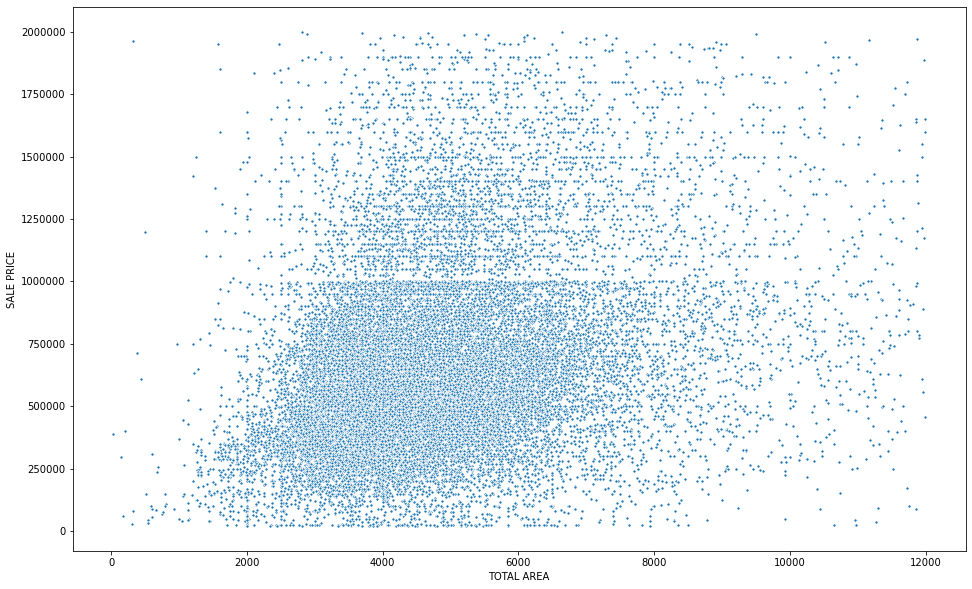

In [18]:
#plotting area against price
plt.figure(figsize=(16, 10))
ax=sns.scatterplot(data=finaldf, x="TOTAL AREA", y="SALE PRICE",s=10)
ax.ticklabel_format( style='plain')
plt.show()

In [19]:
finaldf['TOTAL AREA'].corr(finaldf['SALE PRICE'])

0.2995808021778173

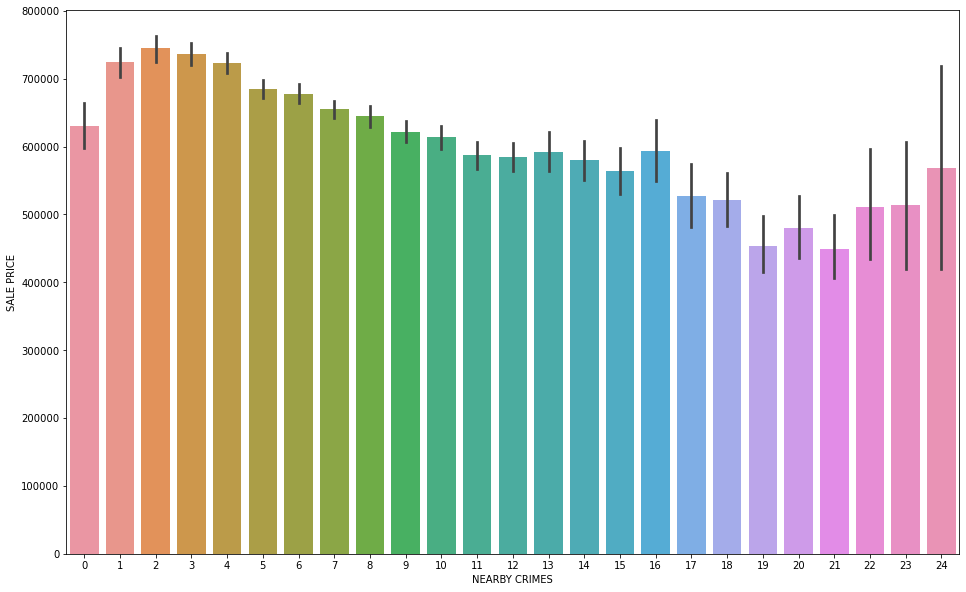

In [20]:
#plotting area against price
plt.figure(figsize=(16, 10))
ax=sns.barplot(data=finaldf, x="NEARBY CRIMES", y="SALE PRICE")

plt.show()

In [21]:
finaldf['NEARBY CRIMES'].corr(finaldf['SALE PRICE'])

-0.1515061470522369

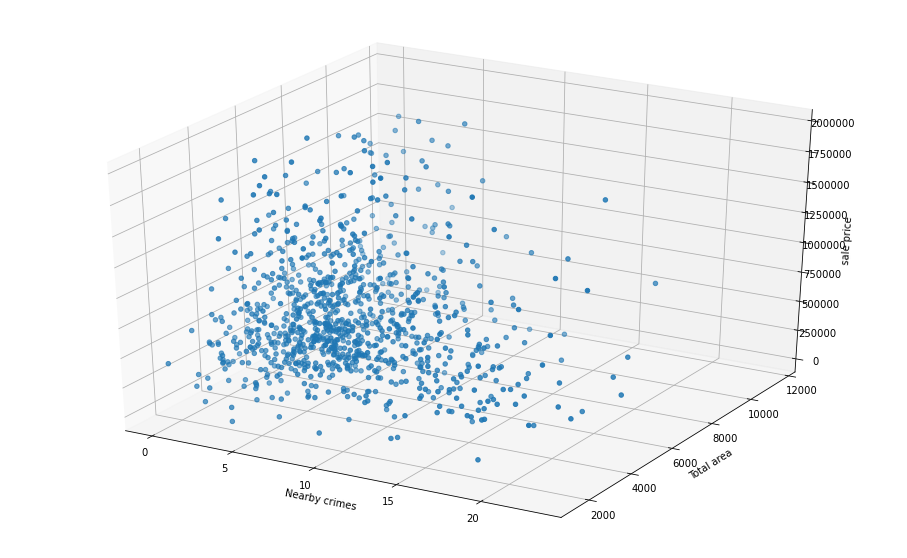

In [22]:
#plotting our values in a 3D space
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
finaldf1=finaldf.sample(n=1000,replace=False,random_state=3)
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(finaldf1[['NEARBY CRIMES']],finaldf1[['TOTAL AREA']],finaldf1[['SALE PRICE']])
ax.ticklabel_format( style='plain')
ax.set_xlabel('Nearby crimes');
ax.set_ylabel('Total area');
ax.set_zlabel('sale price');

<Figure size 1152x720 with 0 Axes>

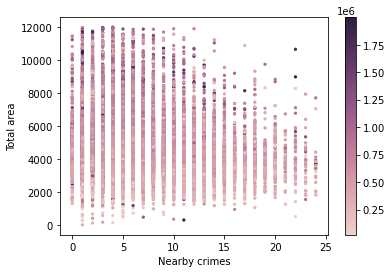

In [23]:
#plotting our values in a 2D space
cmap = sns.cubehelix_palette(as_cmap=True)
fig=plt.figure(figsize=(16,10))
f,ax = plt.subplots()
points = ax.scatter(finaldf[['NEARBY CRIMES']],finaldf[['TOTAL AREA']], c=finaldf['SALE PRICE'], s=5, cmap=cmap)
f.set_label('Sale price')
f.colorbar(points)
ax.set_xlabel('Nearby crimes');
ax.set_ylabel('Total area');
f.set_label('Sale price')

In [24]:
finaldf=finaldf[['NEARBY CRIMES','TOTAL AREA','SALE PRICE']]

In [25]:
finaldf


,NEARBY CRIMES,TOTAL AREA,SALE PRICE
0,3,7896,1583840
1,3,7896,416790
2,3,7896,630370
3,2,5017,93000
4,2,1536,1375000
...,...,...,...
25813,7,7190,625000
25814,6,4625,509000
25815,7,4975,450000
25816,4,4875,550000


In [38]:
#creating and training our model
! pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
xtrain,xtest,ytrain,ytest=train_test_split(finaldf[["NEARBY CRIMES","TOTAL AREA"]],finaldf['SALE PRICE'],test_size = 0.2, random_state=1)
regr = linear_model.LinearRegression()
regr.fit (xtrain, ytrain)
print ('Coefficients: ', regr.coef_, "Intercept:", regr.intercept_)
print(regr.score(xtest, ytest))


Coefficients:  [-8134.250231      61.82510587] Intercept: 422744.8249407327


0.08649959376111038

In [44]:
#calculating MSE for our model
from sklearn.metrics import mean_squared_error
yhat=regr.predict(xtest)
print(mean_squared_error(ytest,yhat))

120954375852.14969


In [29]:
#preparing for plotting results
yhatdf=pd.DataFrame(yhat.astype(float))

In [30]:
#preparing for plotting results

xytest=pd.concat([xtest, ytest.reindex(xtest.index)], axis=1)
xyhat=pd.concat([xtest, yhatdf.reindex(xtest.index)], axis=1)

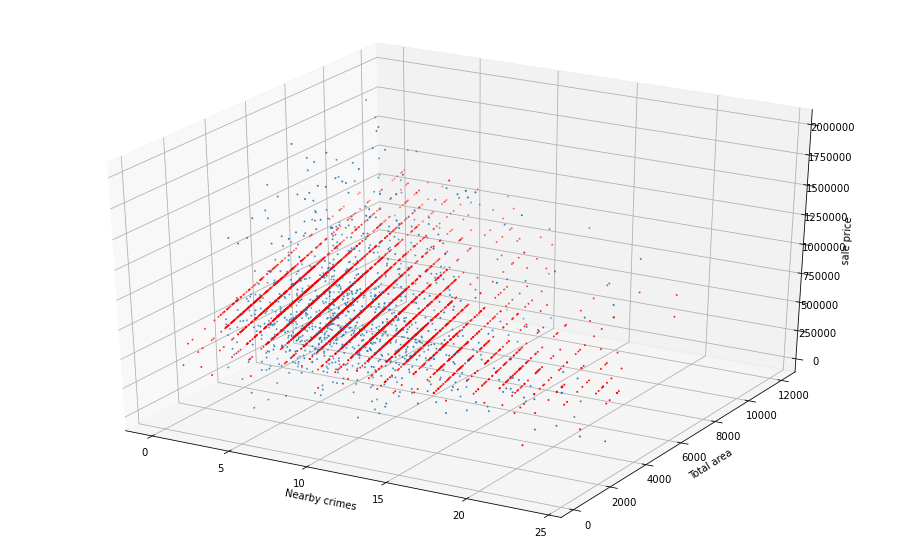

In [31]:
#plotting results

from mpl_toolkits.mplot3d import Axes3D
from pylab import *
xytest=xytest.sample(n=1000,replace=False,random_state=3)
fig=plt.figure(figsize=(16,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xytest[['NEARBY CRIMES']],xytest[['TOTAL AREA']],xytest[['SALE PRICE']],s=1)
ax.scatter(xyhat[['NEARBY CRIMES']],xyhat[['TOTAL AREA']],yhat,c='red', s=1)
ax.ticklabel_format( style='plain')
ax.set_xlabel('Nearby crimes');
ax.set_ylabel('Total area');
ax.set_zlabel('sale price');

(0.0, 2000000.0)

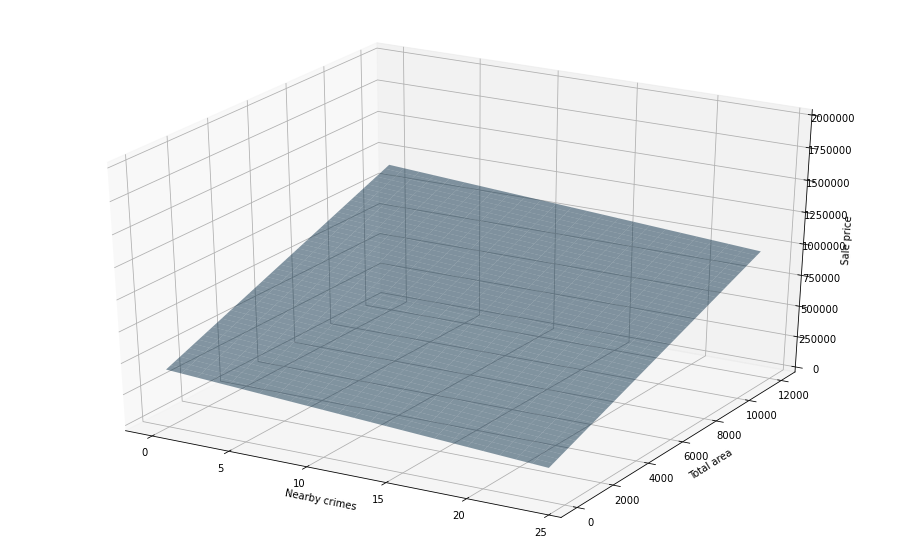

In [41]:
#plotting planar version of model

xx, yy = np.meshgrid(range(25), range(12000))
z = ((61.82510587*yy)+(-8134.250231*xx)+422744.8249407327)

fig=plt.figure(figsize=(16,10)).gca(projection='3d')
fig.plot_surface(xx, yy, z, alpha=0.5)
fig.ticklabel_format( style='plain')
fig.set_xlabel('Nearby crimes');
fig.set_ylabel('Total area');
fig.set_zlabel('Sale price');
fig.set_zlim(0,2000000)